# Yash Patel
# 4/4/24
# Advanced Analysis of Oklahoma City Thunder's Regular Season Stats from 2021-2023


### Project Purpose/Goal: 
#### Sam Presti, the Oklahoma City Thunder's GM, orchestrated a rebuild post-2020 by trading key players for future draft picks and focusing on developing young talent like Shai Gilgeous-Alexander. He prioritized financial flexibility, emphasized patience, and built a long-term vision to position the team for sustained success in the future. This project will aim to find out which of the players meet the high-value standard. 

### Methodology: 
#### I will use two datasets from each season, Per Game stats and Advanced stats. 
#### Per game statistics in basketball (points per game, assists, blocks, and steals) are counted to provide a standardized measure of player performance across different games and enable easy comparison between players.
#### Advanced Stats are a way to study basketball through objective analysis. It is a more in-depth way to look at a simple box score, and more accurately evaluates the skill and production of a player or team (i.e. effective field goal percentage (eFG%), true shooting percentage (TS%), (on-court/off-court) plus–minus, adjusted plus-minus (APM), real plus/minus (RPM), player efficiency rating (PER), offense efficiency rating, offensive rating, defensive rating, similarity score, tendex, etc.).

In [7]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

### Get data from nba.com using requests and BeautifulSoup

In [8]:
# Source: www.basketball-reference.com
# www.basketball-reference.com contains more advanced statistics than other stat-keeping websites (nba, ESPN, CBS Sports, etc.)

# 3 urls for 3 different seasons - I will scrape 2 tables from each season 
url1 = 'http://www.basketball-reference.com/teams/OKC/2021.html'
url2 = 'https://www.basketball-reference.com/teams/OKC/2022.html'
url3 = 'https://www.basketball-reference.com/teams/OKC/2023.html'

In [9]:
# function to scrape webpages 
def createBS(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page, "html.parser")
        return soup
    else:
        print(f"Received status code {status}")

In [10]:
# scraped webpages variables 
soup1 = createBS(url1)
soup2 = createBS(url2)
soup3 = createBS(url3)

### Scrape player data from tables and store in 6 DataFrames

In [12]:
# create the table variables - 2 for each season
per_game_table_2021 = soup1.find(id='per_game').tbody
advanced_table_2021 = soup1.find(id='advanced').tbody

per_game_table_2022 = soup2.find(id='per_game').tbody
advanced_table_2022 = soup2.find(id='advanced').tbody

per_game_table_2023 = soup3.find(id='per_game').tbody
advanced_table_2023 = soup3.find(id='advanced').tbody

### Data Frame 1 Method - Per Game Stats
#### Per game statistics in basketball (points per game, assists, blocks, and steals) are counted to provide a standardized measure of player performance across different games and enable easy comparison between players.

In [13]:
def dataframe1(per_game_table):
    # list to hold players' attributes (name, ppg, apg, etc.) as it iterates through the rows; eventually will be sent to data frame
    per_game_stats = []
        
    for row in per_game_table.find_all('tr'):
        
        player_name = row.find(attrs={'data-stat':'player'}).text
        games = row.find(attrs={'data-stat':'g'}).text
        minutes_played = row.find(attrs={'data-stat':'mp_per_g'}).text
        field_goal_pct = row.find(attrs={'data-stat':'fg_pct'}).text
        three_point_pct = row.find(attrs={'data-stat':'fg3_pct'}).text
        two_point_pct = row.find(attrs={'data-stat':'fg2_pct'}).text
        eFG_pct = row.find(attrs={'data-stat':'efg_pct'}).text # This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
        free_throw_pct = row.find(attrs={'data-stat':'ft_pct'}).text
        # next 3 colums of data are rebounds per game (offensive, defensive, total)
        orb = row.find(attrs={'data-stat':'orb_per_g'}).text
        drb = row.find(attrs={'data-stat':'drb_per_g'}).text
        trb = row.find(attrs={'data-stat':'trb_per_g'}).text
        ast = row.find(attrs={'data-stat':'ast_per_g'}).text
        stl = row.find(attrs={'data-stat':'stl_per_g'}).text
        blk = row.find(attrs={'data-stat':'blk_per_g'}).text
        tov = row.find(attrs={'data-stat':'tov_per_g'}).text
        pts = row.find(attrs={'data-stat':'pts_per_g'}).text
        
        per_game_stats.append({'Name':player_name, 'Games Played':games, 'Minutes Played':minutes_played, 'FG%':field_goal_pct, '3PT%':three_point_pct, '2PT%':two_point_pct, 'eFG%': eFG_pct, 'FT%':free_throw_pct, 'ORB': orb, 'DRB':drb, 'TRB':trb, 'AST':ast, 'STL':stl, 'BLK':blk, 'TOV':tov, 'Points':pts})
        
    return per_game_stats
    

### Data Frame 2 Method - Advanced Stats
#### Advanced Stats are a way to study basketball through objective analysis. It is a more in-depth way to look at a simple box score, and more accurately evaluates the skill and production of a player or team (i.e. true shooting percentage (TS%), box plus–minus, player efficiency rating (PER), value over replacement player (VORP), etc.).

In [22]:
def dataframe2(advanced_table):
    # list to hold players' attributes (name, ppg, apg, etc.) as it iterates through the rows; eventually will be sent to data frame
    advanced_stats = []
        
    for row in advanced_table.find_all('tr'):
        
        player_name = row.find(attrs={'data-stat':'player'}).text
        games = row.find(attrs={'data-stat':'g'}).text
        minutes_played = row.find(attrs={'data-stat':'mp'}).text
        per = row.find(attrs={'data-stat':'per'}).text # Player Efficiency Rating - A measure of per-minute production standardized such that the league average is 15.
        ts_pct = row.find(attrs={'data-stat':'ts_pct'}).text # True shooting Percentage - A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
        orb_pct = row.find(attrs={'data-stat':'orb_pct'}).text # Offensive Rebound Percentage - An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.
        drb_pct = row.find(attrs={'data-stat':'drb_pct'}).text # Defensive Rebound Percentage - An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor."
        trb_pct = row.find(attrs={'data-stat':'trb_pct'}).text # Total Rebound Percentage - An estimate of the percentage of available rebounds a player grabbed while they were on the floor."
        ast_pct = row.find(attrs={'data-stat':'ast_pct'}).text # Assist Percentage - An estimate of the percentage of teammate field goals a player assisted while they were on the floor.
        stl_pct = row.find(attrs={'data-stat':'stl_pct'}).text # Steal Percentage - An estimate of the percentage of opponent possessions that end with a steal by the player while they were on the floor.
        blk_pct = row.find(attrs={'data-stat':'blk_pct'}).text # Block Percentage - An estimate of the percentage of opponent two-point field goal attempts blocked by the player while they were on the floor.
        tov_pct = row.find(attrs={'data-stat':'tov_pct'}).text # Turnover Percentage - An estimate of turnovers committed per 100 plays.
        usg_pct = row.find(attrs={'data-stat':'usg_pct'}).text # Usage Percentage - An estimate of the percentage of team plays used by a player while they were on the floor. 
        ows = row.find(attrs={'data-stat':'ows'}).text # Offensive Win Shares - An estimate of the number of wins contributed by a player due to offense.
        dws = row.find(attrs={'data-stat':'dws'}).text # Defensive Win Shares - An estimate of the number of wins contributed by a player due to defense.
        obpm = row.find(attrs={'data-stat':'obpm'}).text # Offensive Box Plus/Minus - A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
        dbpm = row.find(attrs={'data-stat':'dbpm'}).text# Defensive Box Plus/Minus - A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
        bpm = row.find(attrs={'data-stat':'bpm'}).text # Box Plus/Minus - A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
        vorp = row.find(attrs={'data-stat':'vorp'}).text # Value over Replacement Player - A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement.

        advanced_stats.append({'Name':player_name, 'Games Played':games, 'Minutes Played':minutes_played, 'PER':per, 'TS%':ts_pct, 'ORB%':orb_pct, 'DRB%':drb_pct, 'TRB%': trb_pct, 'AST%':ast_pct, 'STL%':stl_pct, 'BLK%':blk_pct, 'TOV%':tov_pct, 'USG%':usg_pct, 'OWS':ows, 'DWS':dws, 'OBPM':obpm, 'DBPM':dbpm, 'Plus/Minus':bpm, 'VORP':vorp})
        
    return advanced_stats
    

### Create 6 data frames to hold per game and advanced stats for 3 seasons

In [78]:
# data frames - Per Game + Advanced Stats for 2020-2021
per_game_df_2021 = pd.DataFrame(dataframe1(per_game_table_2021))
advanced_df_2021 = pd.DataFrame(dataframe2(advanced_table_2021))

# data frames - Per Game + Advanced Stats for 2021-2022
per_game_df_2022 = pd.DataFrame(dataframe1(per_game_table_2022))
advanced_df_2022 = pd.DataFrame(dataframe2(advanced_table_2022))

# data frames - Per Game + Advanced Stats for 2022-2023
per_game_df_2023 = pd.DataFrame(dataframe1(per_game_table_2023))
advanced_df_2023 = pd.DataFrame(dataframe2(advanced_table_2023))

In [27]:
# saving data frames to csv files
per_game_df_2021.to_csv('per_game_stats_2021.csv')
advanced_df_2021.to_csv('advanced_stats_2021.csv')

per_game_df_2022.to_csv('per_game_stats_2022.csv')
advanced_df_2022.to_csv('advanced_stats_2022.csv')

per_game_df_2023.to_csv('per_game_stats_2023.csv')
advanced_df_2023.to_csv('advanced_stats_2023.csv')

### Visualize Data using Seaborn

### 1. Who are the most efficient scorers? 
#### Stats used: FG%, effective FG%, 3PT%, 2PT%, FT%, Points Per Game, and True Shooting Percentage

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# function will be called 3 times to sort scorers from last 3 seasons
def efficientScorers(per_game_df, advanced_df, year):
    # Load the datasets
    per_game_stats = pd.read_csv(per_game_df)
    advanced_stats = pd.read_csv(advanced_df)
    
    # Merge the datasets on the 'Name' column
    merged_stats = pd.merge(per_game_stats, advanced_stats[['Name', 'TS%']], on='Name')
    
    # Select the columns we are interested in for the plot
    columns_to_plot = ['Name', 'FG%', 'eFG%', '3PT%', '2PT%', 'FT%', 'Points', 'TS%']
    merged_stats = merged_stats[columns_to_plot]

    # Sort the players by Points Per Game
    merged_stats_sorted_points = merged_stats.sort_values('Points', ascending=False)
    
    # Separate the first row (headers)
    headers = merged_stats.iloc[0]
    # Convert specific columns to numeric
    for col in ['FG%', 'eFG%', '3PT%', '2PT%', 'FT%', 'Points', 'TS%']:
        merged_stats[col][1:] = pd.to_numeric(merged_stats[col][1:], errors='coerce')
    # Concatenate the headers with the numeric dataframe
    merged_stats = pd.concat([headers.to_frame().transpose(), merged_stats.iloc[1:]])
    
    
    # original algorithm to determine superior scorers
    # calculate the scoring superiority index
    merged_stats['Scoring_Superiority'] = ((merged_stats[['3PT%', '2PT%', 'FT%']].mean(axis=1) +
                                            merged_stats['FG%'] +
                                            merged_stats[['TS%', 'eFG%']].mean(axis=1)) / 5.0) * 100.0
    
    # Sort the players by Scoring Superiority
    merged_stats_sorted = merged_stats.sort_values('Scoring_Superiority', ascending=False)

    
    # Create the barplot for Scoring Superiority
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Scoring_Superiority', y='Name', data=merged_stats_sorted, errorbar=None, color='#ff5b00', label='Scoring Superiority')
    # Create the barplot for Points Per Game
    sns.barplot(x='Points', y='Name', data=merged_stats_sorted_points, errorbar=None, color='#152eff', label='Points Per Game')
    
    plt.title('OKC Players Scorer Ranking ' + year)
    plt.xlabel('Rank')
    plt.ylabel('Player')
    plt.legend()
    plt.show()
    

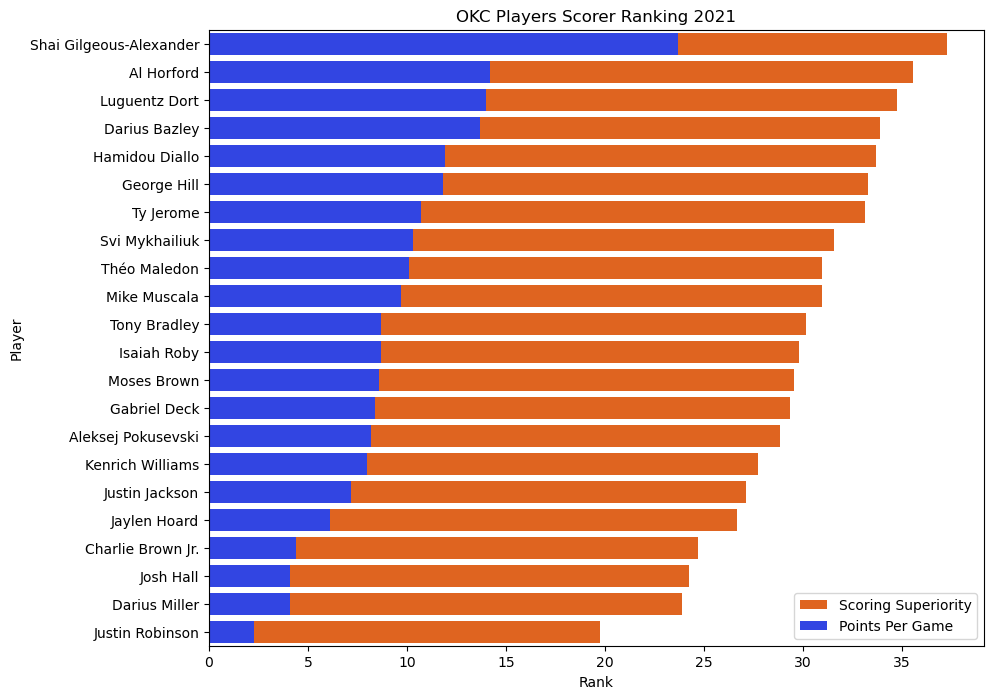

In [98]:
# visualization for best scorers from 2020-2021
efficientScorers('per_game_stats_2021.csv', 'advanced_stats_2021.csv', '2021')

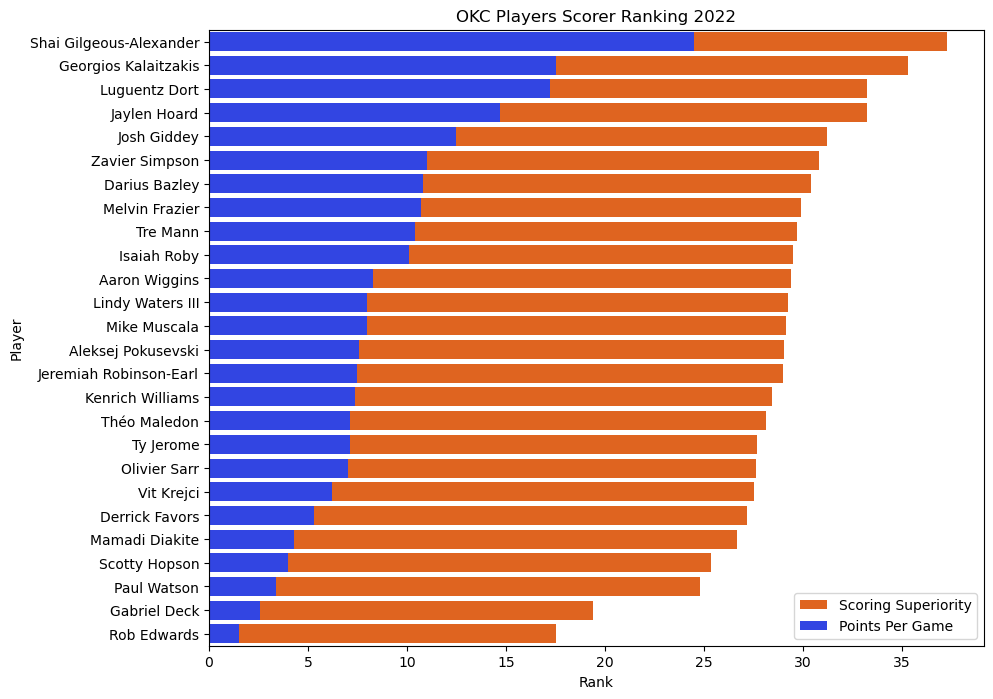

In [99]:
# visualization for best scorers from 2021-2022
efficientScorers('per_game_stats_2022.csv', 'advanced_stats_2022.csv', '2022')

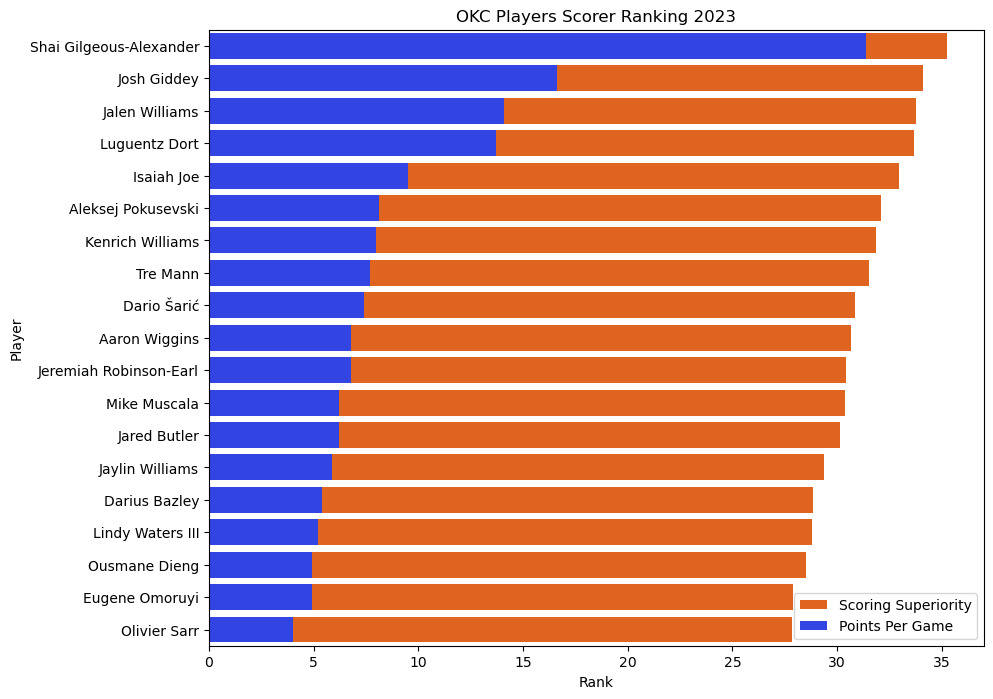

In [100]:
# visualization for best scorers from 2022-2023
efficientScorers('per_game_stats_2023.csv', 'advanced_stats_2023.csv', '2023')

### 2. Who are the most efficient defenders? 
#### Stats used: Defensive rebounds per game, steals per game, blocks per game, DRB%, STL%, BLK%, defensive win shares, and defensive box plus/minus

In [101]:
# function will be called 3 times to sort defenders from last 3 seasons
def efficientDefenders(per_game_df, advanced_df, year):
    # Load the datasets
    per_game_stats = pd.read_csv(per_game_df)
    advanced_stats = pd.read_csv(advanced_df)

    # Merge the datasets on the 'Name' column
    merged_stats = pd.merge(per_game_stats, advanced_stats[['Name', 'DRB%', 'STL%', 'BLK%', 'DWS', 'DBPM']], on='Name')

    # Select the columns we are interested in for the plot
    columns_to_plot = ['Name', 'DRB', 'STL', 'BLK', 'DRB%', 'STL%', 'BLK%', 'DWS', 'DBPM']
    merged_stats = merged_stats[columns_to_plot]

    # Separate the first row (headers)
    headers = merged_stats.iloc[0]
    # Convert specific columns to numeric
    for col in ['DRB', 'STL', 'BLK', 'DRB%', 'STL%', 'BLK%', 'DWS', 'DBPM']:
        merged_stats[col][1:] = pd.to_numeric(merged_stats[col][1:], errors='coerce')
    # Concatenate the headers with the numeric dataframe
    merged_stats = pd.concat([headers.to_frame().transpose(), merged_stats.iloc[1:]])
    
    # original algorithm to determine superior defenders
    # Calculate the defensive superiority index
    merged_stats['Defensive_Superiority'] = ((merged_stats['DRB'] + 
                                              merged_stats['STL'] + 
                                              merged_stats['BLK'] + 
                                              merged_stats['DRB%'] + 
                                              merged_stats['STL%'] + 
                                              merged_stats['BLK%'] + 
                                              merged_stats['DWS']) / 7.0)
    
    # Sort the players by Defensive Superiority
    merged_stats_sorted_defense = merged_stats.sort_values('Defensive_Superiority', ascending=False)
    
    # Sort the players by Defensive Box Plus Minus
    merged_stats_sorted_dbpm = merged_stats.sort_values('DBPM', ascending=False)
    
    # Create the barplot for Defensive Superiority
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Defensive_Superiority', y='Name', data=merged_stats_sorted_defense,errorbar=None, color='#ff5b00', label='Defensive Superiority')
    
    # Create the barplot for Defensive Box Plus Minus
    sns.barplot(x='DBPM', y='Name', data=merged_stats_sorted_dbpm, errorbar=None, color='#152eff', label='Defensive Box Plus Minus')
    
    plt.title('OKC Players Defensive Ranking ' + year)
    plt.xlabel('Rank')
    plt.ylabel('Player')
    plt.legend()
    plt.show()
    

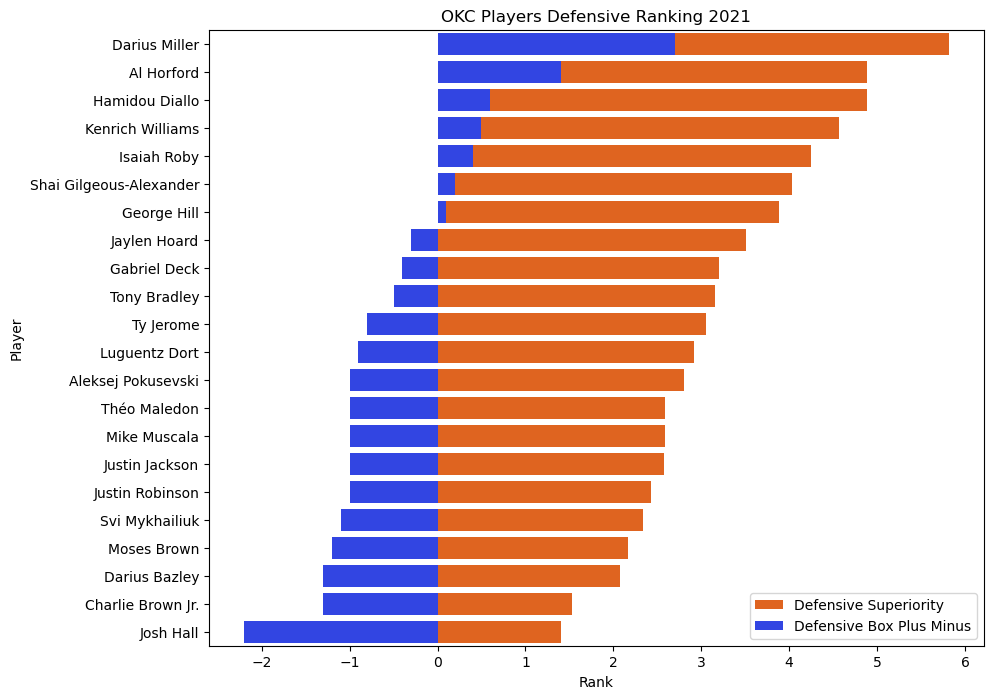

In [102]:
# visualization for best defenders from 2020-2021
efficientDefenders('per_game_stats_2021.csv', 'advanced_stats_2021.csv', '2021')

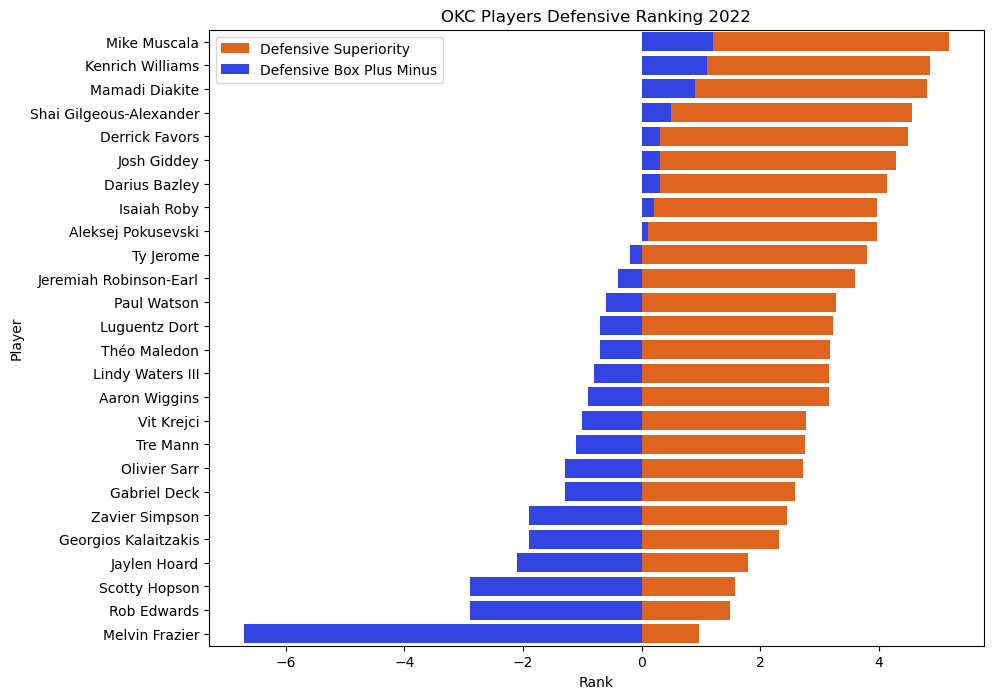

In [103]:
# visualization for best defenders from 2021-2022
efficientDefenders('per_game_stats_2022.csv', 'advanced_stats_2022.csv', '2022')

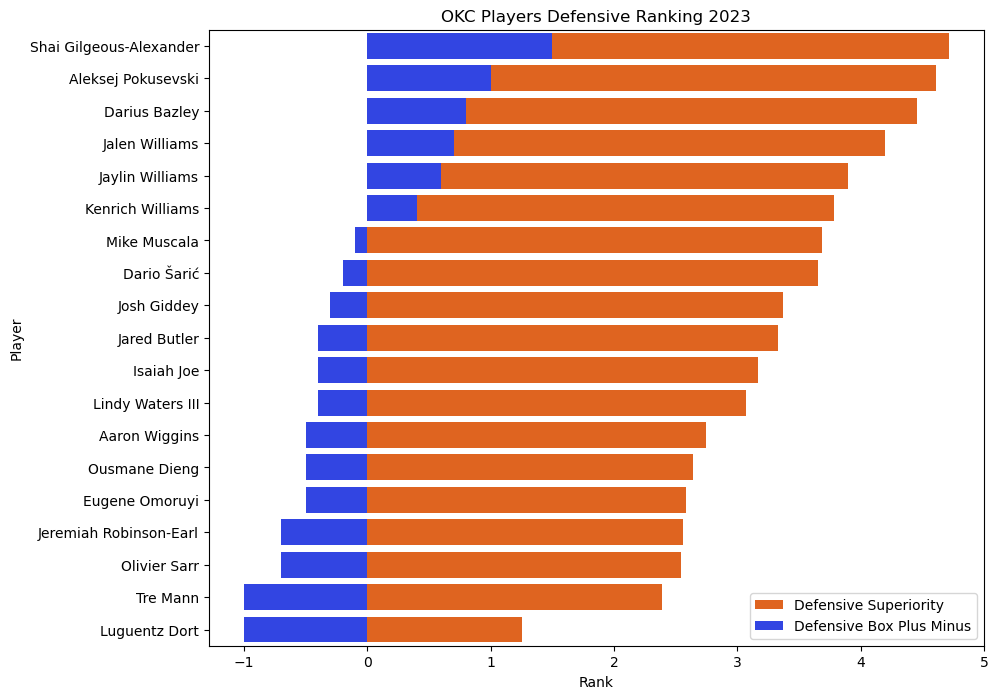

In [104]:
# visualization for best defenders from 2022-2023
efficientDefenders('per_game_stats_2023.csv', 'advanced_stats_2023.csv', '2023')

### 3. Who are the underrated players that deserve to start/get more playing time?
#### Stats used: Games, Minutes Played, Player Efficiency Rating (PER), and Value over Replacement Player (VORP)

In [143]:
# function will be called 3 times to sort defenders from last 3 seasons
def underrated(per_game_df, advanced_df, year):
    # Load the datasets
    per_game_stats = pd.read_csv(per_game_df)
    advanced_stats = pd.read_csv(advanced_df)

    # Merge the datasets on the 'Name' column
    merged_stats = pd.merge(per_game_stats, advanced_stats[['Name', 'PER', 'VORP']], on='Name')

    # Select the columns we are interested in for the plot
    columns_to_plot = ['Name', 'Games Played', 'Minutes Played', 'PER', 'VORP']
    merged_stats = merged_stats[columns_to_plot]

    # Separate the first row (headers)
    headers = merged_stats.iloc[0]
    # Convert specific columns to numeric
    for col in ['Games Played', 'Minutes Played', 'PER', 'VORP']:
        merged_stats[col][1:] = pd.to_numeric(merged_stats[col][1:], errors='coerce')
    # Concatenate the headers with the numeric dataframe
    merged_stats = pd.concat([headers.to_frame().transpose(), merged_stats.iloc[1:]])

    # Remove players who have played above 27.5 minutes (starters; they can't be underrated)
    merged_stats = merged_stats[merged_stats['Minutes Played'] <= 27.5]

    # Sort the players by Player Efficiency Rating (PER)
    merged_stats_sorted_per = merged_stats.sort_values('PER', ascending=False)

    # original algorithm to determine superior defenders
    # Calculate the defensive superiority index
    merged_stats['Underrated_Index'] = ((merged_stats['Games Played'] * merged_stats['Minutes Played'] / 100 + merged_stats['VORP']+ 10))

    # Sort the players by Underrated Index
    merged_stats_sorted_underrated = merged_stats.sort_values('Underrated_Index', ascending=False)

    # Create the barplot for Underrated Index
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Underrated_Index', y='Name', data=merged_stats_sorted_underrated, errorbar=None, color='#ff5b00', label='Underrated Index')
    
    # Create the barplot for Player Efficiency Rating (PER)
    sns.barplot(x='PER', y='Name', data=merged_stats_sorted_per, errorbar=None, color='#152eff', label='Player Efficiency Rating (PER)')
    
    plt.title('Underrated Players vs Player Efficiency Rating (PER) ' + year)
    plt.xlabel('Rank')
    plt.ylabel('Player')
    plt.legend()
    plt.show()


### The more orange there is, the more underrated that player is.

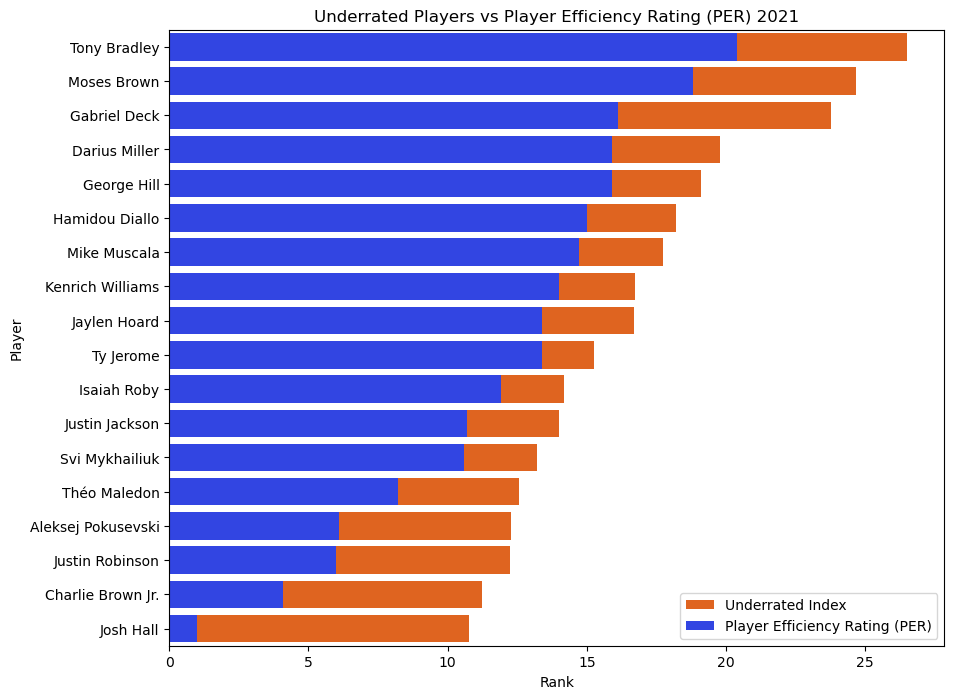

In [145]:
# visualization for underrated players from 2020-2021
underrated('per_game_stats_2021.csv', 'advanced_stats_2021.csv', '2021')

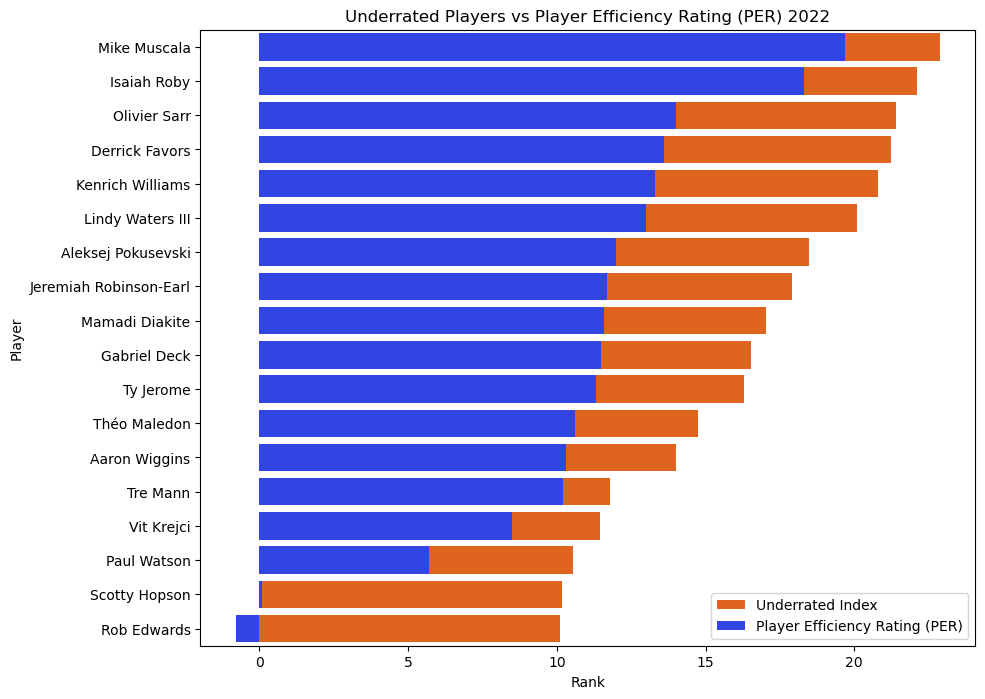

In [146]:
# visualization for underrated players from 2021-2022
underrated('per_game_stats_2022.csv', 'advanced_stats_2022.csv', '2022')

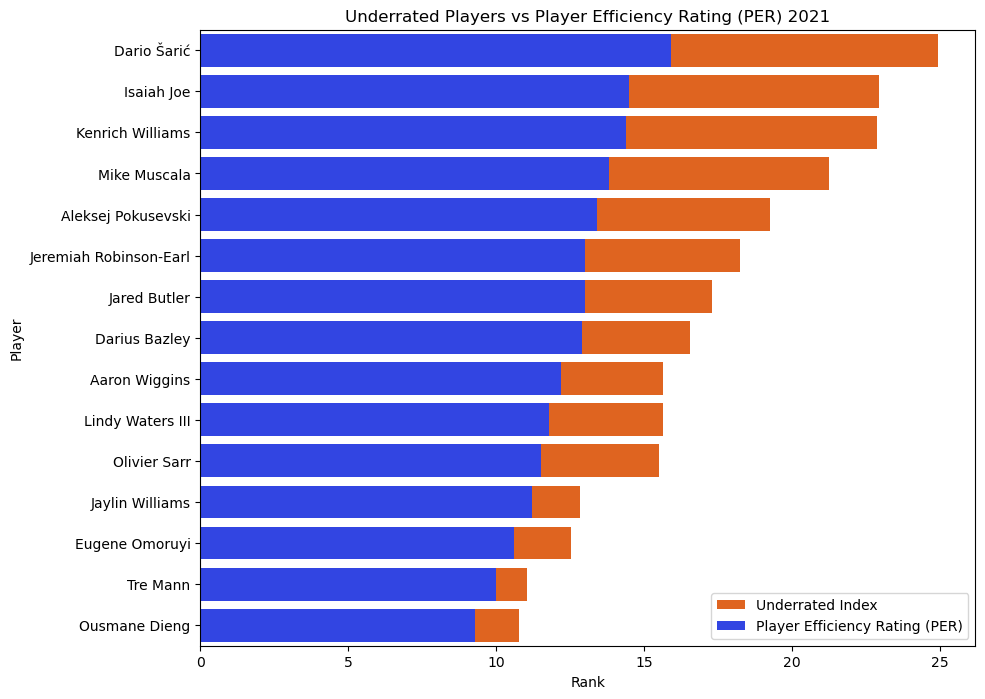

In [147]:
# visualization for underrated player from 2022-2023
underrated('per_game_stats_2023.csv', 'advanced_stats_2023.csv', '2021')

### 4. Does a player's field goal percentage (FG%) always correlate with effective field goal percentage (eFG%)? 
#### Stats used: FG%, eFG%
##### This is important because eFG% tells us how effective those field goals are at impacting a game. For example, a player could have an FG% of 80% if he makes 8 out of 10 layups (16 points). However, someone with a 46% FG% could have made 6 3's out of 13 tries (18 points). Thus, the second player had a stronger impact in the game. eFG% is a statistic that adjusts field goal percentage to account for the fact that three-point field goals count for three points, while all other field goals only count for two points.

In [181]:
# function will be called 3 times to sort scorers from last 3 seasons
def question4(per_game_df, year):
    
    # Load the datasets
    per_game_stats = pd.read_csv(per_game_df)
    
    # Select the columns we are interested in for the plot
    columns_to_plot = ['Name', 'FG%', 'eFG%']
    per_game_stats = per_game_stats[columns_to_plot]
    
    # Separate the first row (headers)
    headers = per_game_stats.iloc[0]
    # Convert specific columns to numeric
    for col in ['FG%', 'eFG%']:
        per_game_stats[col][1:] = pd.to_numeric(per_game_stats[col][1:], errors='coerce')

    # Concatenate the headers with the numeric dataframe
    per_game_stats = pd.concat([headers.to_frame().transpose(), per_game_stats.iloc[1:]])

    # Sort the players by FG%
    per_game_stats_sorted_fg = per_game_stats.sort_values('FG%', ascending=False)
    # Sort the players by eFG%
    per_game_stats_sorted_efg = per_game_stats.sort_values('eFG%', ascending=False)

    plt.figure(figsize=(10, 6))
    
    # Plot for per_game_stats_sorted_fg
    sns.lineplot(data=per_game_stats_sorted_fg, x='Name', y='FG%', label='FG%')
    
    # Plot for per_game_stats_sorted_efg
    sns.lineplot(data=per_game_stats_sorted_efg, x='Name', y='eFG%', label='eFG%')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=80)
    
    plt.title('FG% and eFG% of Players in ' + year)
    plt.xlabel('Player')
    plt.ylabel('Percentage')
    plt.legend()
    plt.tight_layout()
    plt.show()

/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

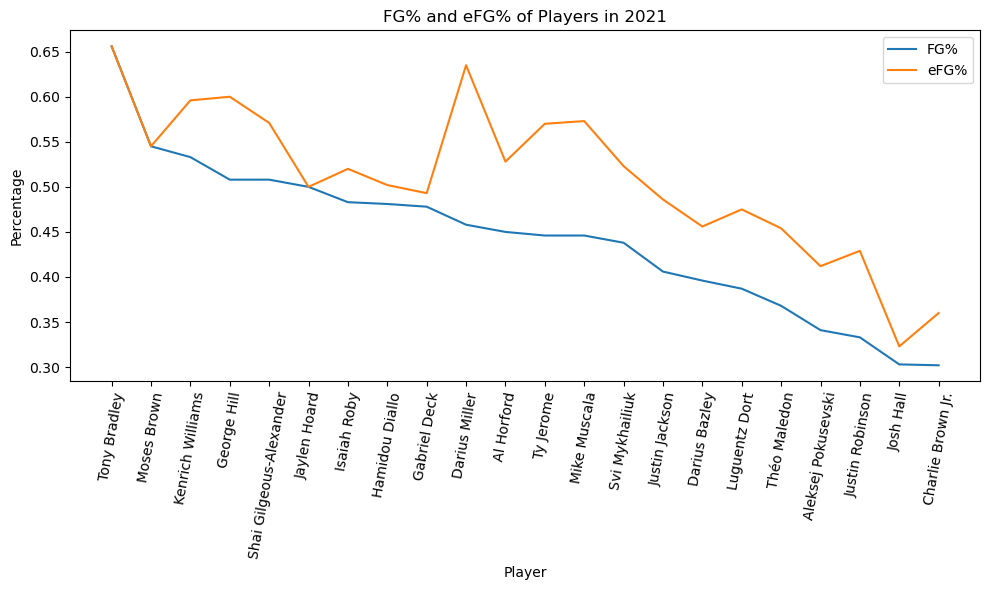

In [182]:
# visualization for question 4 from 2020-2021
question4('per_game_stats_2021.csv', '2021')

#### From this graph we can deduce that in 2021, although effective field goal percentage in somewhat closely correlated to field goal percentage, there are some players like Darius Miller and Mike Muscala whose effectiveness are not reflected in their field goal percentage.

/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

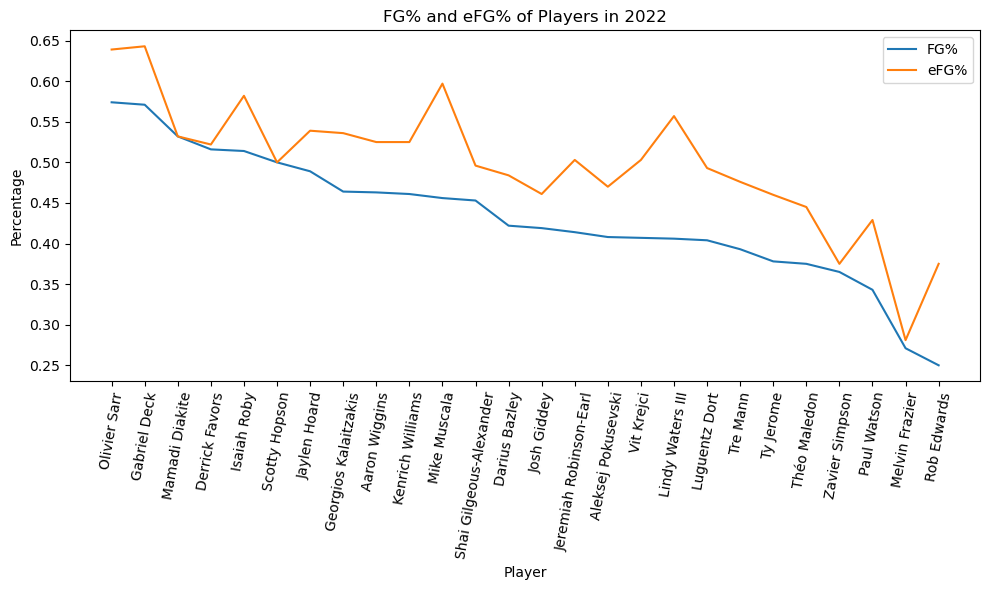

In [183]:
# visualization for question 4 from 2021-2022
question4('per_game_stats_2022.csv', '2022')

#### From this graph we can deduce that in 2022, although effective field goal percentage in somewhat closely correlated to field goal percentage, there are some players like Mike Muscala and Lindy Walters III whose effectiveness are not reflected in their field goal percentage.

/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

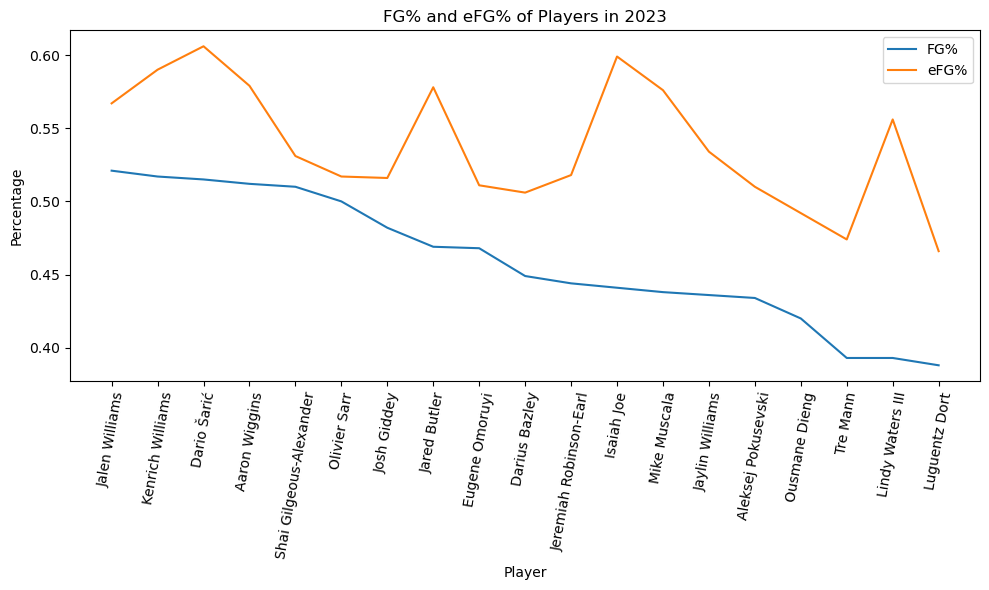

In [184]:
# visualization for question 4 from 2022-2023
question4('per_game_stats_2023.csv', '2023')

#### From this graph we can deduce that in 2022, although effective field goal percentage in somewhat closely correlated to field goal percentage, there are some players like Isaiah Joe whose effectiveness are not reflected in their field goal percentage.

### 5. Does the average of offensive box plus minus and defensive box plus minus correlate to box plus minus? 
#### Stats used: OBPM, DBPM, BPM

In [185]:
# function will be called 3 times to sort scorers from last 3 seasons
def question5(advanced_df, year):
    
    # Load the datasets
    advanced_stats = pd.read_csv(advanced_df)
    
    # Select the columns we are interested in for the plot
    columns_to_plot = ['Name', 'OBPM', 'DBPM', 'Plus/Minus']
    advanced_stats = advanced_stats[columns_to_plot]
    
    # Separate the first row (headers)
    headers = advanced_stats.iloc[0]
    # Convert specific columns to numeric
    for col in ['OBPM', 'DBPM', 'Plus/Minus']:
        advanced_stats[col][1:] = pd.to_numeric(advanced_stats[col][1:], errors='coerce')

    # Concatenate the headers with the numeric dataframe
    advanced_stats = pd.concat([headers.to_frame().transpose(), advanced_stats.iloc[1:]])


    # Sort the players by BPM
    advanced_stats_sorted_bpm = advanced_stats.sort_values('Plus/Minus', ascending=False)
    
    # Group by player name and calculate the average of 'OBPM' and 'DBPM' for each player
    advanced_stats['average'] = (advanced_stats['OBPM'] + advanced_stats['DBPM']) /2

    # Sort the players with the calculated average
    advanced_stats_sorted_avg = advanced_stats.sort_values('average', ascending=False)


    plt.figure(figsize=(10, 6))
    
    # Plot for per_game_stats_sorted_fg
    sns.lineplot(data=advanced_stats_sorted_avg, x='Name', y='average', label='Avg. of OBPM + DBPM')
    
    # Plot for per_game_stats_sorted_efg
    sns.lineplot(data=advanced_stats_sorted_bpm, x='Name', y='Plus/Minus', label='BPM')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=80)
    
    plt.title('Does Avg. of OBPM and DBPM = BPM? in ' + year)
    plt.xlabel('Player')
    plt.ylabel('Plus/Minus Score')
    plt.legend()
    plt.tight_layout()
    plt.show()

/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

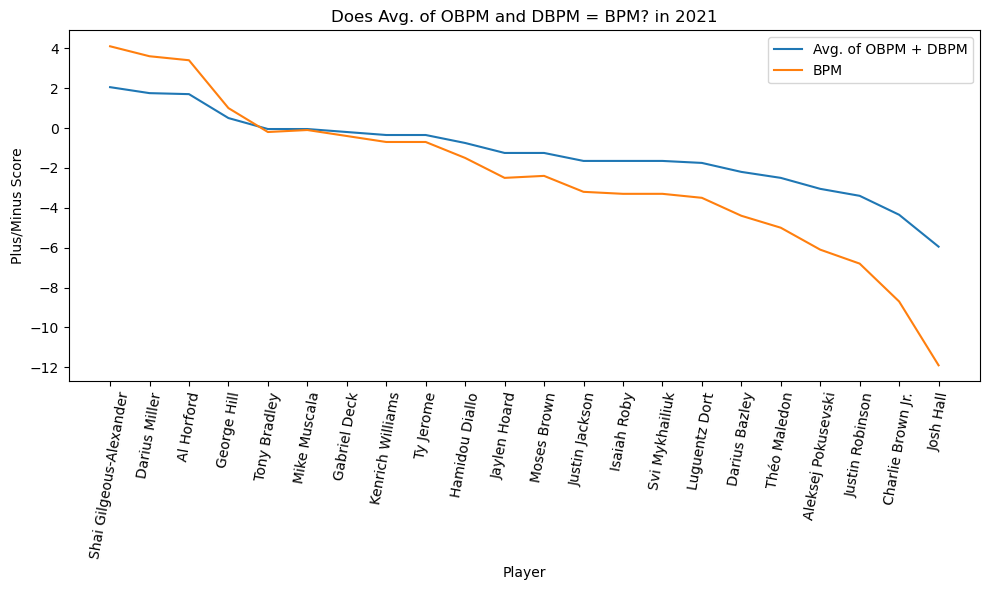

In [186]:
# visualization for question 5 from 2020-2021
question5('advanced_stats_2021.csv', '2021')

/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

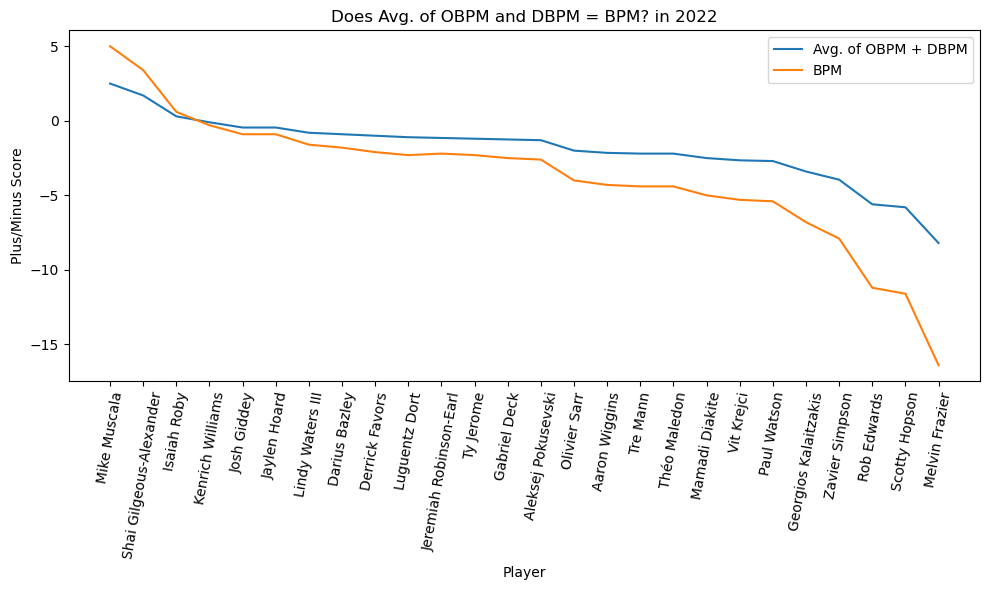

In [187]:
# visualization for question 5 from 2021-2022
question5('advanced_stats_2022.csv', '2022')

/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ytpatel3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

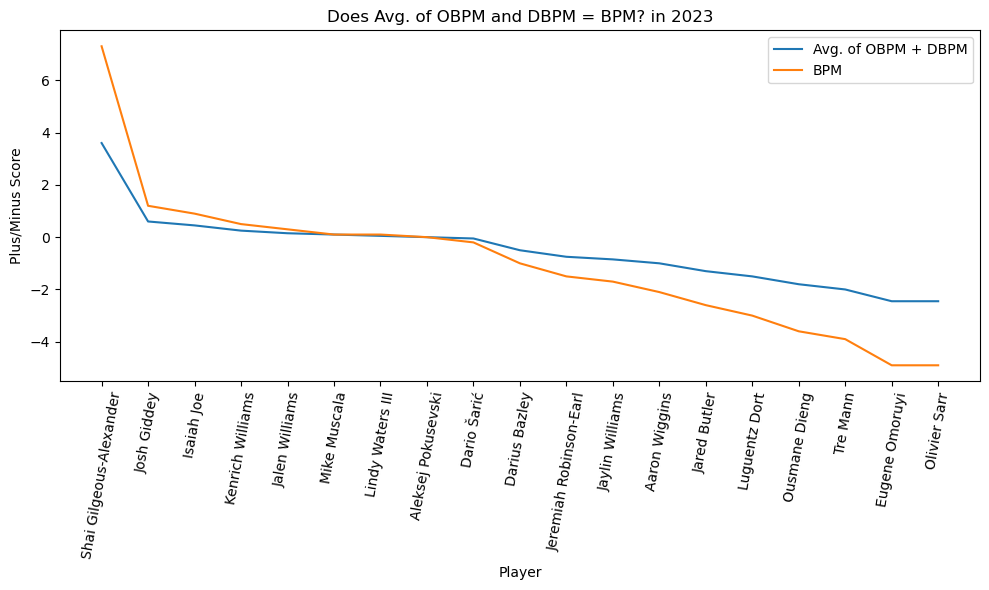

In [188]:
# visualization for question 6 from 2022-2023
question5('advanced_stats_2023.csv', '2023')

#### From all 3 line plots we can deduce that the average of OBPM + DBPM roughly equal BPM, but not exactly.